In [8]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

#Setup
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [9]:
print(mnist.train.labels.shape,mnist.validation.labels.shape,mnist.test.labels.shape)

(55000, 10) (5000, 10) (10000, 10)


In [10]:
mnist.validation.labels[388,:]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.])

In [11]:
D = 784 # dimensionality
K = 10 # number of classes
X_train = np.zeros((55000,D))
y_train = np.zeros((55000,K), dtype=np.int)



In [18]:
# split data into 80-20
from sklearn import cross_validation

X_tr, X_ts, y_tr, y_ts,X_vl,y_vl = mnist.train.images, mnist.test.images, mnist.train.labels, mnist.test.labels, mnist.validation.images, mnist.validation.labels
X1=np.concatenate((X_tr, X_vl),axis=0)
y1=np.concatenate((y_tr, y_vl),axis=0)
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X1, y1, test_size=0.2)

# from sklearn.cross_validation import KFold
# from sklearn import cross_validation

# kf = KFold(60000, n_folds=5,shuffle=True)

# for train_index, val_index in kf:
# #     print("TRAIN:", train_index, "VAL:", val_index)
#     X_train, X_val = X1[train_index], X1[val_index]
#     y_train, y_val = y1[train_index], y1[val_index]


#     print(y_train.shape,y_val.shape,X_train.shape)


y_train1=np.zeros((48000,1),dtype='uint8')
# y_val1=np.zeros((12000,1),dtype='uint8')
y_test1=np.zeros((12000,1),dtype='uint8')


for j in range(48000):
    for i in range(9):
        if y_train[j,i]==1:
            y_train1[j]=i
for j in range(12000):
    for i in range(9):
        if y_test[j,i]==1:
            y_test1[j]=i

print(y_train1.shape,y_test1.shape)

(48000, 1) (12000, 1)


In [13]:
# split data into 50-50
from sklearn import cross_validation

X_tr, X_ts, y_tr, y_ts,X_vl,y_vl = mnist.train.images, mnist.test.images, mnist.train.labels, mnist.test.labels, mnist.validation.images, mnist.validation.labels
X1=np.concatenate((X_tr, X_vl),axis=0)
y1=np.concatenate((y_tr, y_vl),axis=0)
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X1, y1, test_size=0.5)

# from sklearn.cross_validation import KFold
# from sklearn import cross_validation

# kf = KFold(60000, n_folds=5,shuffle=True)

# for train_index, val_index in kf:
# #     print("TRAIN:", train_index, "VAL:", val_index)
#     X_train, X_val = X1[train_index], X1[val_index]
#     y_train, y_val = y1[train_index], y1[val_index]


#     print(y_train.shape,y_val.shape,X_train.shape)


y_train1=np.zeros((30000,1),dtype='uint8')
# y_val1=np.zeros((12000,1),dtype='uint8')
y_test1=np.zeros((30000,1),dtype='uint8')


for j in range(30000):
    for i in range(9):
        if y_train[j,i]==1:
            y_train1[j]=i
for j in range(30000):
    for i in range(9):
        if y_test[j,i]==1:
            y_test1[j]=i

print(y_train1.shape,y_test1.shape)

(30000, 1) (30000, 1)


In [26]:
# Linear model

# Start with an initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))



# Initial values from hyperparameter
reg = 1e-3 # regularization strength

# num_examples = X_train.shape[0]


#Initial value for the Gradient Descent Parameter
step_size = 1e-2 #Also called learning rate

#For simplicity, we will not hand tune this algorithm parameter as well.


In [29]:

Xtt=X_train[0:10000,:]
ytt=y_train1[0:10000,:]
# Xtt=X_train[15001:30000,:]
# ytt=y_train1[15001:30000,:]
num_examples = Xtt.shape[0]
# gradient descent loop
for i in range(100):
    
    hidden_layer = np.maximum((np.dot(Xtt, W) + b)*0.01, np.dot(Xtt, W) + b) # note, ReLU activation
    scores = (np.dot(hidden_layer, W2) + b2)/1000000

    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

    # compute the loss: average cross-entropy loss and regularization
    corect_logprobs = -np.log(probs[range(num_examples),ytt])
    data_loss = (np.sum(corect_logprobs)/num_examples)/1000000
    reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
    loss = data_loss + reg_loss
    if i % 10 == 0:
        print ("iteration:",i, " loss:", loss)

    # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples),ytt] -= 1
    dscores /= num_examples

    # backpropate the gradient to the parameters
    # first backprop into parameters W2 and b2
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden = np.dot(dscores, W2.T)
    # backprop the ReLU non-linearity
    dhidden[hidden_layer <= 0] = 0
    # finally into W,b
    dW = np.dot(Xtt.T, dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True)

    # add regularization gradient contribution
    dW2 += reg * W2
    dW += reg * W

    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2

iteration: 0  loss: 5.66447762653
iteration: 10  loss: 113.018285292
iteration: 20  loss: 2219.87836425
iteration: 30  loss: 43007.6867318
iteration: 40  loss: nan
iteration: 50  loss: nan
iteration: 60  loss: nan
iteration: 70  loss: nan
iteration: 80  loss: nan
iteration: 90  loss: nan


In [30]:
# Post-training: evaluate test set accuracy

#For simplicity, we will use training data as proxy for test. Do not do this.


hidden_layer = np.maximum((np.dot(Xtt, W) + b)*0.01, np.dot(Xtt, W) + b) # note, ReLU activation
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print("train accuracy:",(np.mean(predicted_class == ytt)))

hidden_layer = np.maximum((np.dot(X_test, W) + b)*0.01, np.dot(X_test, W) + b) # note, ReLU activation
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print("test accuracy:",(np.mean(predicted_class == y_test1)))

train accuracy: 0.1951
test accuracy: 0.200416666667


In [32]:
#4.4- cross val
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))



# Initial values from hyperparameter
reg = 1e-3 # regularization strength

# num_examples = X_train.shape[0]


#Initial value for the Gradient Descent Parameter
step_size = 1e-2 #Also called learning rate
kf_train_acc=[]
kf_val_acc=[]


from sklearn.cross_validation import KFold
from sklearn import cross_validation

kf = KFold(60000, n_folds=5,shuffle=True)

for train_index, val_index in kf:
#     print("TRAIN:", train_index, "VAL:", val_index)
    X_train, X_val = X1[train_index], X1[val_index]
    y_train, y_val = y1[train_index], y1[val_index]


#     print(y_train.shape,y_val.shape,X_train.shape)


    y_train1=np.zeros((48000,1),dtype='uint8')
    y_val1=np.zeros((12000,1),dtype='uint8')

    for j in range(48000):
        for i in range(9):
            if y_train[j,i]==1:
                y_train1[j]=i
    for j in range(12000):
        for i in range(9):
            if y_val[j,i]==1:
                y_val1[j]=i
    Xtt=X_train[0:10000,:]
    ytt=y_train1[0:10000,:]
#     Xtt=X_train[24001:48000,:]
#     ytt=y_train1[24001:48000,:]
    num_examples = Xtt.shape[0]
    # gradient descent loop
    for i in range(50):

        
        hidden_layer = np.maximum((np.dot(Xtt, W) + b)*0.01, np.dot(Xtt, W) + b) # note, ReLU activation
        scores = (np.dot(hidden_layer, W2) + b2)/1000000

        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

        # compute the loss: average cross-entropy loss and regularization
        corect_logprobs = -np.log(probs[range(num_examples),ytt])
        data_loss = (np.sum(corect_logprobs)/num_examples)/1000000
        reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
        loss = data_loss + reg_loss
        if i % 1000 == 0:
            print ("iteration:",i, " loss:", loss)

        # compute the gradient on scores
        dscores = probs
        dscores[range(num_examples),ytt] -= 1
        dscores /= num_examples

        # backpropate the gradient to the parameters
        # first backprop into parameters W2 and b2
        dW2 = np.dot(hidden_layer.T, dscores)
        db2 = np.sum(dscores, axis=0, keepdims=True)
        # next backprop into hidden layer
        dhidden = np.dot(dscores, W2.T)
        # backprop the ReLU non-linearity
        dhidden[hidden_layer <= 0] = 0
        # finally into W,b
        dW = np.dot(Xtt.T, dhidden)
        db = np.sum(dhidden, axis=0, keepdims=True)

        # add regularization gradient contribution
        dW2 += reg * W2
        dW += reg * W

        # perform a parameter update
        W += -step_size * dW
        b += -step_size * db
        W2 += -step_size * dW2
        b2 += -step_size * db2
    
    hidden_layer = np.maximum(0, np.dot(Xtt, W) + b) # note, ReLU activation
    scores = np.dot(hidden_layer, W2) + b2
    predicted_class = np.argmax(scores, axis=1)
    print("train accuracy:",(np.mean(predicted_class == ytt)))
    kf_train_acc.append(np.mean(predicted_class == ytt))
    
    hidden_layer = np.maximum(0, np.dot(X_val, W) + b) # note, ReLU activation
    scores = np.dot(hidden_layer, W2) + b2
    predicted_class = np.argmax(scores, axis=1)
    print("val accuracy:",(np.mean(predicted_class == y_val1)))
    kf_val_acc.append(np.mean(predicted_class == y_val1))

print("cross validation-train acc:",np.mean(kf_train_acc),"cross validation-val acc:",np.mean(kf_val_acc))

iteration: 0  loss: 0.0270021173984
train accuracy: 0.0972
val accuracy: 0.0985833333333
iteration: 0  loss: 5.07749170589
train accuracy: 0.2004
val accuracy: 0.200916666667
iteration: 0  loss: nan
train accuracy: 0.2024
val accuracy: 0.198916666667
iteration: 0  loss: nan
train accuracy: 0.2025
val accuracy: 0.19575
iteration: 0  loss: nan
train accuracy: 0.2007
val accuracy: 0.199666666667
cross validation-train acc: 0.18064 cross validation-val acc: 0.178766666667


iteration: 0  loss: 23025.8548971
iteration: 0  loss: 23025.8548971
iteration: 0  loss: 23025.8548842
iteration: 0  loss: 23025.8548588
iteration: 0  loss: 23025.8548185
iteration: 0  loss: 23025.8547426
iteration: 0  loss: 23025.8545039
iteration: 0  loss: 23025.8531276
iteration: 0  loss: 23025.8409311
iteration: 0  loss: 23025.6928457


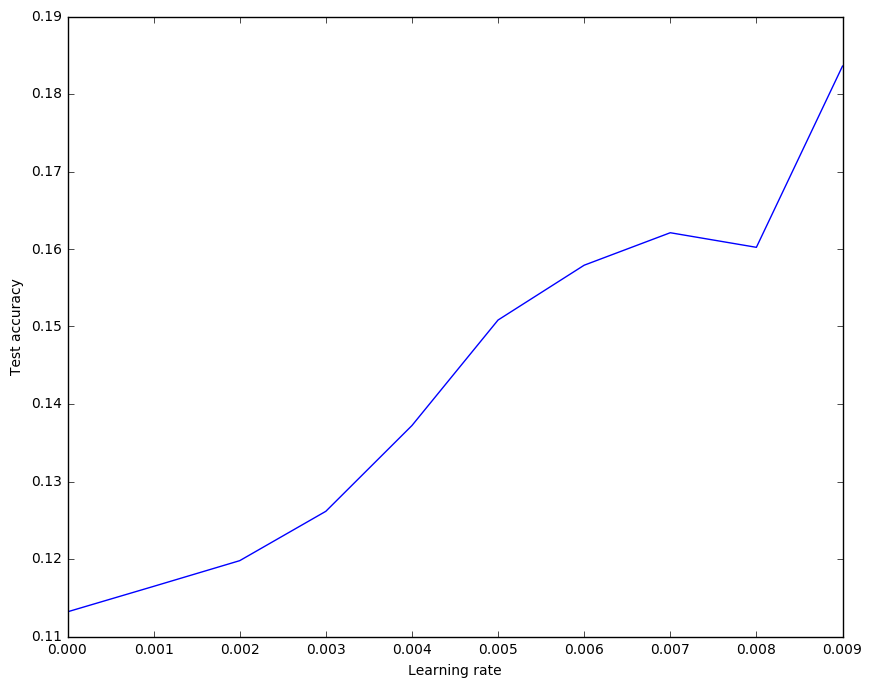

In [37]:
#4.5

h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))



# Initial values from hyperparameter
reg = 1e-3 # regularization strength

# num_examples = X_train.shape[0]


#Initial value for the Gradient Descent Parameter
# step_size = 1e-2 #Also called learning rate
Xtt=X_train[0:10000,:]
ytt=y_train1[0:10000,:]
# Xtt=X_train[24001:48000,:]
# ytt=y_train1[24001:48000,:]
num_examples = Xtt.shape[0]
tr_acc=[]
ts_acc=[]
stp_arr=np.arange(0.0,0.01,0.001) 
#(0.01,0.1,0.01)        (0.001,0.01,0.001)
for step_size in np.arange(0.0,0.01,0.001)  :
    


    # gradient descent loop
    for i in range(10):
        hidden_layer = np.maximum((np.dot(Xtt, W) + b)*0.01, np.dot(Xtt, W) + b) # note, ReLU activation
        scores = (np.dot(hidden_layer, W2) + b2)/1000000

        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

        # compute the loss: average cross-entropy loss and regularization
        corect_logprobs = -np.log(probs[range(num_examples),ytt])
        data_loss = np.sum(corect_logprobs)/num_examples
        reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
        loss = data_loss + reg_loss
        if i % 1000 == 0:
            print ("iteration:",i, " loss:", loss)

        # compute the gradient on scores
        dscores = probs
        dscores[range(num_examples),ytt] -= 1
        dscores /= num_examples

        # backpropate the gradient to the parameters
        # first backprop into parameters W2 and b2
        dW2 = np.dot(hidden_layer.T, dscores)
        db2 = np.sum(dscores, axis=0, keepdims=True)
        # next backprop into hidden layer
        dhidden = np.dot(dscores, W2.T)
        # backprop the ReLU non-linearity
        dhidden[hidden_layer <= 0] = 0
        # finally into W,b
        dW = np.dot(Xtt.T, dhidden)
        db = np.sum(dhidden, axis=0, keepdims=True)

        # add regularization gradient contribution
        dW2 += reg * W2
        dW += reg * W

        # perform a parameter update
        W += -step_size * dW
        b += -step_size * db
        W2 += -step_size * dW2
        b2 += -step_size * db2
        
    hidden_layer = np.maximum((np.dot(Xtt, W) + b)*0.01, np.dot(Xtt, W) + b) # note, ReLU activation
    scores = (np.dot(hidden_layer, W2) + b2)
    predicted_class = np.argmax(scores, axis=1)
#     print ("train accuracy: ",(np.mean(predicted_class == y_train)))
    tr_acc1=np.mean(predicted_class == ytt)
    tr_acc.append(tr_acc1)
    
    hidden_layer = np.maximum((np.dot(X_test, W) + b)*0.01, np.dot(X_test, W) + b) # note, ReLU activation
    scores = (np.dot(hidden_layer, W2) + b2)
    predicted_class = np.argmax(scores, axis=1)
#     print ("test accuracy: ",(np.mean(predicted_class == y_test)))
    ts_acc1=np.mean(predicted_class == y_test1)
    ts_acc.append(ts_acc1)
    
plt.plot(stp_arr,ts_acc)
plt.ylabel('Test accuracy')
plt.xlabel('Learning rate')
plt.show()

In [34]:
ts_acc

[]

iteration: 0  loss: 23025.61381
iteration: 0  loss: 22823.6203606
iteration: 0  loss: 21975.6200791
iteration: 0  loss: nan
iteration: 0  loss: nan
iteration: 0  loss: nan
iteration: 0  loss: nan
iteration: 0  loss: nan
iteration: 0  loss: nan


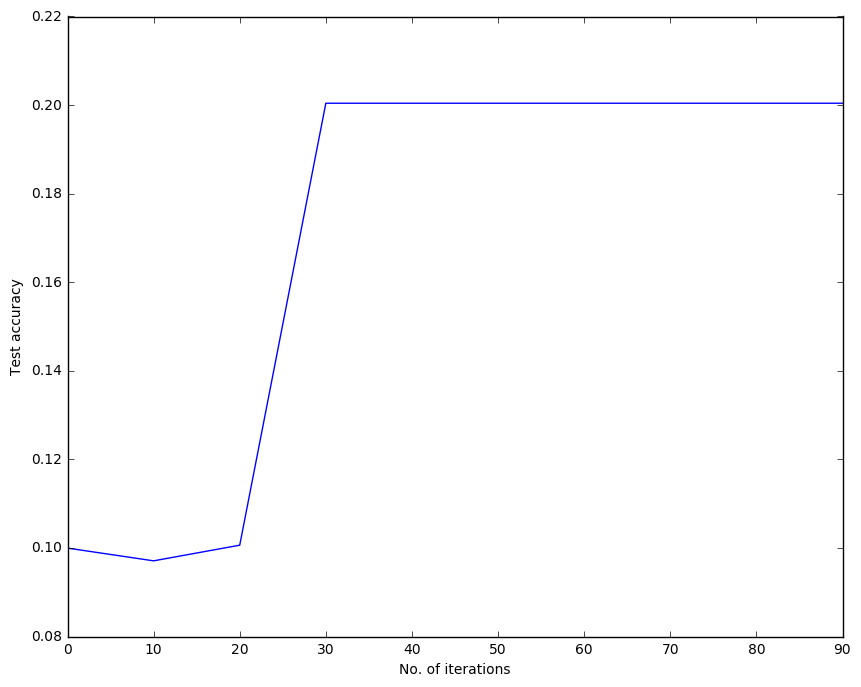

In [38]:
#4.5b
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))



# Initial values from hyperparameter
reg = 1e-3 # regularization strength

#For simplicity, we will not optimize this using grid search here.b#Perform batch SGD using backprop

#For simplicity we will take the batch size to be the same as number of examples
# num_examples = X_train.shape[0]


#Initial value for the Gradient Descent Parameter
step_size = 1e-2 #Also called learning rate

#For simplicity, we will not hand tune this algorithm parameter as well.


Xtt=X_train[0:10000,:]
ytt=y_train1[0:10000,:]
# Xtt=X_train[24001:48000,:]
# ytt=y_train1[24001:48000,:]
num_examples = Xtt.shape[0]
tr_acc=[]
ts_acc=[]
iter_arr=np.arange(0,100,10)
for iter in np.arange(0,100,10):
    


    # gradient descent loop
    for i in range(iter):

        hidden_layer = np.maximum((np.dot(Xtt, W) + b)*0.01, np.dot(Xtt, W) + b) # note, ReLU activation
        scores = (np.dot(hidden_layer, W2) + b2)/1000000

        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

        # compute the loss: average cross-entropy loss and regularization
        corect_logprobs = -np.log(probs[range(num_examples),ytt])
        data_loss = (np.sum(corect_logprobs)/num_examples)/1000000
        reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
        loss = data_loss + reg_loss
        if i % 1000 == 0:
            print ("iteration:",i, " loss:", loss)

        # compute the gradient on scores
        dscores = probs
        dscores[range(num_examples),ytt] -= 1
        dscores /= num_examples

        # backpropate the gradient to the parameters
        # first backprop into parameters W2 and b2
        dW2 = np.dot(hidden_layer.T, dscores)
        db2 = np.sum(dscores, axis=0, keepdims=True)
        # next backprop into hidden layer
        dhidden = np.dot(dscores, W2.T)
        # backprop the ReLU non-linearity
        dhidden[hidden_layer <= 0] = 0
        # finally into W,b
        dW = np.dot(Xtt.T, dhidden)
        db = np.sum(dhidden, axis=0, keepdims=True)

        # add regularization gradient contribution
        dW2 += reg * W2
        dW += reg * W

        # perform a parameter update
        W += -step_size * dW
        b += -step_size * db
        W2 += -step_size * dW2
        b2 += -step_size * db2
        
    hidden_layer = np.maximum((np.dot(Xtt, W) + b)*0.01, np.dot(Xtt, W) + b) # note, ReLU activation
    scores = (np.dot(hidden_layer, W2) + b2)
    predicted_class = np.argmax(scores, axis=1)
#     print ("train accuracy: ",(np.mean(predicted_class == y_train)))
    tr_acc1=np.mean(predicted_class == ytt)
    tr_acc.append(tr_acc1)
    
    hidden_layer = np.maximum((np.dot(X_test, W) + b)*0.01, np.dot(X_test, W) + b) # note, ReLU activation
    scores = (np.dot(hidden_layer, W2) + b2)
    predicted_class = np.argmax(scores, axis=1)
#     print ("test accuracy: ",(np.mean(predicted_class == y_test)))
    ts_acc1=np.mean(predicted_class == y_test1)
    ts_acc.append(ts_acc1)
    
plt.plot(iter_arr,ts_acc)
plt.ylabel('Test accuracy')
plt.xlabel('No. of iterations')
plt.show()

iteration: 0  loss: 23.025850928
iteration: 0  loss: 23.0298584217
iteration: 0  loss: 23.035321678
iteration: 0  loss: 23.0858411216
iteration: 0  loss: 24.3882049943
iteration: 0  loss: 58.3927065345
iteration: 0  loss: 911.0692149
iteration: 0  loss: 21231.6559523
iteration: 0  loss: 490442.851022
iteration: 0  loss: nan


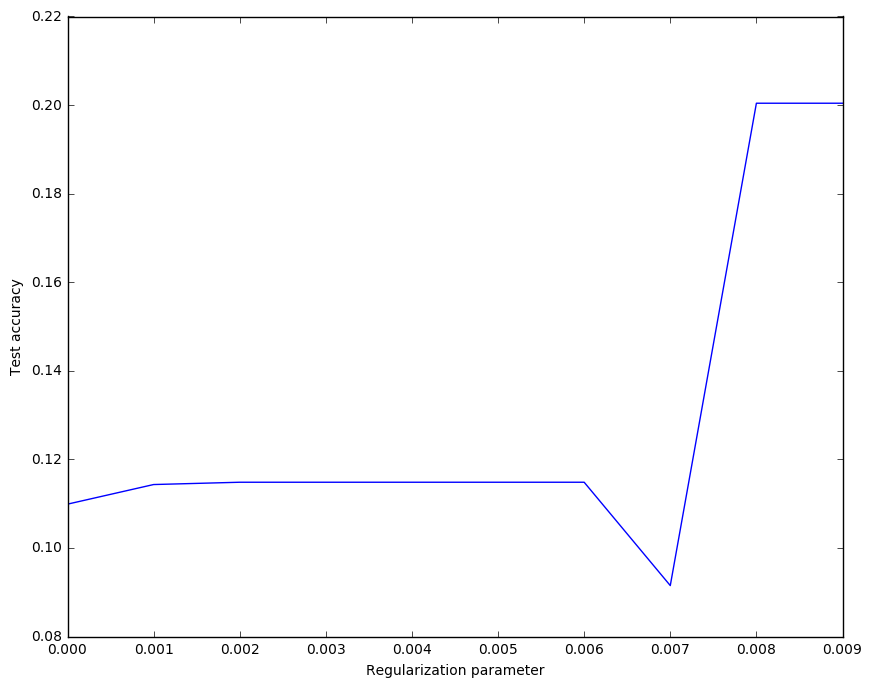

In [39]:
#4.6
# Linear model
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))



# Initial values from hyperparameter
# reg = 1e-3 # regularization strength

#For simplicity, we will not optimize this using grid search here.b#Perform batch SGD using backprop

#For simplicity we will take the batch size to be the same as number of examples
# num_examples = X_train.shape[0]


#Initial value for the Gradient Descent Parameter
step_size = 1e-2 #Also called learning rate


Xtt=X_train[0:10000,:]
ytt=y_train1[0:10000,:]
# Xtt=X_train[24001:48000,:]
# ytt=y_train1[24001:48000,:]
num_examples = Xtt.shape[0]
tr_acc=[]
ts_acc=[]
reg_arr=np.arange(0,0.01,0.001)
for reg in np.arange(0,0.01,0.001):
#     print (iter)
    for i in range(10):

        hidden_layer = np.maximum((np.dot(Xtt, W) + b)*0.01, np.dot(Xtt, W) + b) # note, ReLU activation
        scores = (np.dot(hidden_layer, W2) + b2)/1000000

        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

        # compute the loss: average cross-entropy loss and regularization
        corect_logprobs = -np.log(probs[range(num_examples),ytt])
        data_loss = (np.sum(corect_logprobs)/num_examples)/1000
        reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
        loss = data_loss + reg_loss
        if i % 1000 == 0:
            print ("iteration:",i, " loss:", loss)

        # compute the gradient on scores
        dscores = probs
        dscores[range(num_examples),ytt] -= 1
        dscores /= num_examples

        # backpropate the gradient to the parameters
        # first backprop into parameters W2 and b2
        dW2 = np.dot(hidden_layer.T, dscores)
        db2 = np.sum(dscores, axis=0, keepdims=True)
        # next backprop into hidden layer
        dhidden = np.dot(dscores, W2.T)
        # backprop the ReLU non-linearity
        dhidden[hidden_layer <= 0] = 0
        # finally into W,b
        dW = np.dot(Xtt.T, dhidden)
        db = np.sum(dhidden, axis=0, keepdims=True)

        # add regularization gradient contribution
        dW2 += reg * W2
        dW += reg * W

        # perform a parameter update
        W += -step_size * dW
        b += -step_size * db
        W2 += -step_size * dW2
        b2 += -step_size * db2
        
    hidden_layer = np.maximum((np.dot(Xtt, W) + b)*0.01, np.dot(Xtt, W) + b) # note, ReLU activation
    scores = (np.dot(hidden_layer, W2) + b2)
    predicted_class = np.argmax(scores, axis=1)
    #     print ("train accuracy: ",(np.mean(predicted_class == y_train)))
    tr_acc1=np.mean(predicted_class == ytt)
    tr_acc.append(tr_acc1)

    hidden_layer = np.maximum((np.dot(X_test, W) + b)*0.01, np.dot(X_test, W) + b) # note, ReLU activation
    scores = (np.dot(hidden_layer, W2) + b2)
    predicted_class = np.argmax(scores, axis=1)
    #     print ("test accuracy: ",(np.mean(predicted_class == y_test)))
    ts_acc1=np.mean(predicted_class == y_test1)
    ts_acc.append(ts_acc1)
    
plt.plot(reg_arr,ts_acc)
plt.ylabel('Test accuracy')
plt.xlabel('Regularization parameter')
plt.show()

[0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09] [0.10267539, 0.10267491, 0.10267224, 0.1026694, 0.10266877, 0.10266526, 0.10268501, 0.10268154, 0.10269659, 0.10270512]


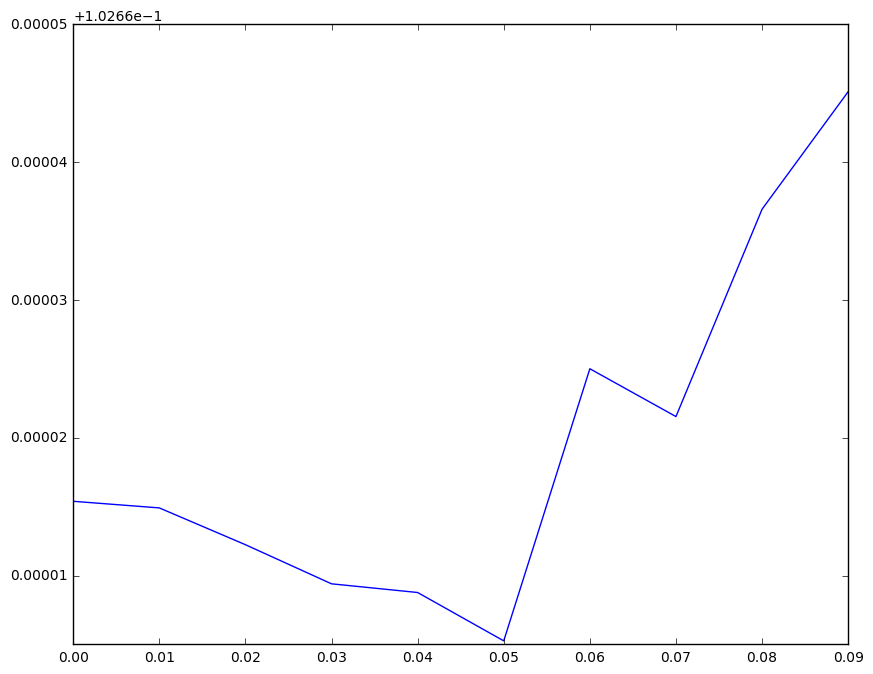

In [40]:
a=[0.10267539000000001, 0.10267490999999999, 0.10267224, 0.10266939999999999, 0.10266877000000001, 0.10266525999999999, 0.10268500999999999, 0.10268154, 0.10269659, 0.10270512] 
b=[ 0, 0.01, 0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09]
# a=[11,12,14,15,16,17,13,19,18,33]
print(b,a)
plt.plot(b,a)
# plt.ylabel('Test accuracy')
# plt.xlabel('Regularization parameter')
plt.show()

In [36]:
# Post-training: evaluate test set accuracy

#For simplicity, we will use training data as proxy for test. Do not do this.


hidden_layer = np.maximum(0, np.dot(Xtt, W) + b) # note, ReLU activation
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print("train accuracy:",(np.mean(predicted_class == ytt)))

hidden_layer = np.maximum(0, np.dot(X_test, W) + b) # note, ReLU activation
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print("test accuracy:",(np.mean(predicted_class == y_test1)))

train accuracy: 0.1974


In [17]:
scores = np.dot(X_train, W) + b
predicted_class = np.argmax(scores, axis=1)
print("train accuracy:",(np.mean(predicted_class == y_train1)))

train accuracy: 0.196708333333


(-1.9195589456423083, 1.9204410543576951)

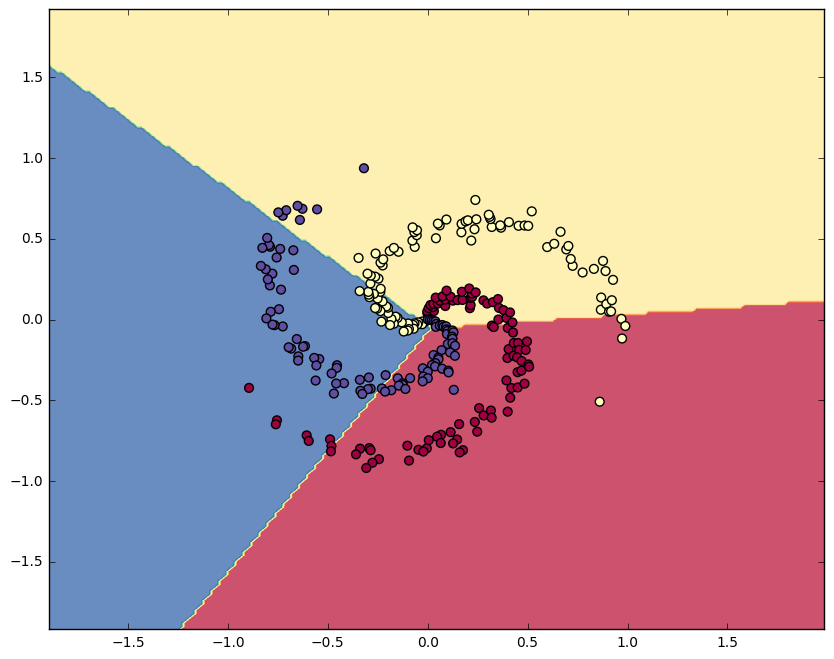

In [36]:
# Post training: plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_linear.png')